In [2]:
import pandas as pd
import os
logs=pd.read_csv("doremus_log_2018-06.csv")

In [5]:
logs.head()

,timestamp,platform,user,channel,intent,confidence,lang,rawMessage,cleanMessage,response
0,2018-6-14 16:03:35,slack,U9Q3FND6E,D9ZCG8VCM,hello,1.00,en,Hi,Hi,Hi! Everyday I try to learn as much as possibl...
1,2018-6-14 18:19:49,slack,U9PUY35FD,DA0A1ALET,hello,1.00,en,Hi,Hi,Hi! Everyday I try to learn as much as possibl...
2,2018-6-16 13:59:34,slack,U9Q3FND6E,D9ZCG8VCM,works-by,0.75,en,Tell me one work by Beethoven,Tell me one work by Beethoven,You told me few filters. Do you want to add so...
3,2018-6-16 14:05:30,slack,U9Q3FND6E,D9ZCG8VCM,works-by,0.73,en,Tell me one work by Beethoven,Tell me one work by Beethoven,You told me few filters. Do you want to add so...
4,2018-6-16 14:05:36,slack,U9Q3FND6E,D9ZCG8VCM,works-by - yes,1.00,en,Yes thanks,Yes thanks!,Ok tell me what


In [6]:
import pandas as pd
import os
path_folder='.'
logs=pd.read_csv("doremus_log_2018-06.csv")
intents=logs["intent"].unique().tolist()
intent_val_data=[]
for intent in intents:
    messages=logs.groupby("intent").get_group(intent)['cleanMessage'].unique().tolist()
    messages=list(map(lambda word: word.replace('"', ''),messages))
    intent_string="## intent: {}".format(intent)
    intent_string="\n - ".join([intent_string]+messages)
    intent_val_data.append(intent_string)
file_name="nlu_validation"
with open(os.path.join(path_folder, '{}.md'.format(file_name)), mode='w') as md_file:
    md_file.write("\n".join(intent_val_data))    

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu_validation.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 247 (13 distinct intents)
	- Found intents: 'discover-artist', 'find-artist', 'works-by - yes', 'find-performance', 'works-by-genre', 'hello', 'reset', 'works-by-artist', 'works-by', 'works-by-instrument', 'works-by-years', 'help', 'works-by - no'
	- entity examples: 180 (7 distinct entities)
	- found entities: 'doremus-instrument', 'doremus-genre', 'date-period', 'number', 'doremus-strictly', 'geo-city', 'doremus-artist'

DEBUG:rasa_nlu.training_data.training_data:Validating training data...
DEBUG:rasa_nlu.extractors.crf_entity_extractor:Inconsistent BILOU tagging found, B- tag, L- tag pair encloses multiple entity classes.i.e. [B-a, I-b, L-a] instea

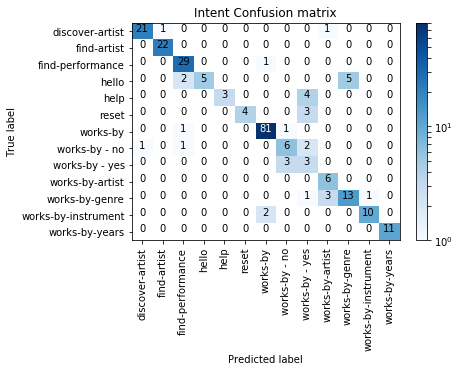

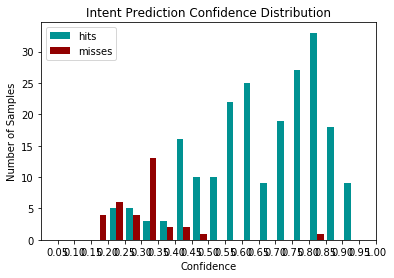

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9083451344948615
INFO:rasa_nlu.evaluate:Precision: 0.9178112199771019
INFO:rasa_nlu.evaluate:Accuracy:  0.9132290184921764
INFO:rasa_nlu.evaluate:Classification report: 
                    precision    recall  f1-score   support

       date-period       0.95      0.81      0.88       157
    doremus-artist       0.97      0.72      0.83       103
     doremus-genre       0.94      0.42      0.59        40
doremus-instrument       1.00      0.89      0.94        27
  doremus-strictly       1.00      1.00      1.00         4
          geo-city       1.00      0.76      0.86        33
         no_entity       0.90      0.99      0.94       949
            number       0.95      0.82      0.88        93

       avg / total       0.92      0.91      0.91      1406



In [38]:
%matplotlib inline
from rasa_nlu.evaluate import run_evaluation


import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')
model_directory='C:/Users/Alaa Boukhary/Desktop/RASA_project/DOREMOS/models/nlu/default/current'

run_evaluation("nlu_validation.md", model_directory)

In [34]:
from rasa_nlu.model import Interpreter

# where model_directory points to the model folder
model_directory='C:/Users/Alaa Boukhary/Desktop/RASA_project/DOREMOS/models/nlu/default/current'
interpreter = Interpreter.load(model_directory)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


In [37]:
interpreter.parse("yes the instrument")

{'intent': {'name': 'works-by-instrument', 'confidence': 0.4154317321932009},
 'entities': [],
 'intent_ranking': [{'name': 'works-by-instrument',
   'confidence': 0.4154317321932009},
  {'name': 'works-by - yes', 'confidence': 0.14817778006961943},
  {'name': 'works-by-years', 'confidence': 0.09865960305111414},
  {'name': 'works-by-genre', 'confidence': 0.0639263459060277},
  {'name': 'works-by', 'confidence': 0.04363060824260125},
  {'name': 'find-performance', 'confidence': 0.04010853695634268},
  {'name': 'find-artist', 'confidence': 0.03706349379313348},
  {'name': 'works-by - no', 'confidence': 0.03653850433636949},
  {'name': 'works-by-artist', 'confidence': 0.03583974184302366},
  {'name': 'discover-artist', 'confidence': 0.02244078832385495}],
 'text': 'yes the instrument'}